### 1. Explaining Data Splitting

When we try to get the better prediction model, we can split the sample. By doing this, we will have two datasets randomly splitted: a training sample and a testing sample. Usually the 75% of the sample is used for training and the reimaing data is used for testing.

We take the original model as: 
$$ Y = \beta_1 X_1 + \beta_2 X_2 $$ 
An a functional model of the regression as:
$$f(X) = \beta_1 X_1 + \beta_2 X_2 $$
 
We split it as:
$$ Y = [ Y^{train} \   Y^{test}] $$ 
$$ X_1 = [X_1^{train} \   X_1^{test}] $$
$$ X_2 = [X_2^{train} \   X_2^{test}] $$ 

In order to estimate the prediction rule, we proceed to regress:  $ Y^{train} $ ~ $ X_1^{train},  X_2^{train}$ to obtain the estimated the parameters of prediction.
$$ \hat{f}(X^{train}) = \hat\beta_1 X_1^{train} + \hat\beta_2 X_2^{train} = \hat{Y}^{train}$$

Next, we will use the testing dataset to compare the predicted outcome, $\hat{Y}^{test}$ as follows:
$$ \hat{Y}^{test} = \hat\beta_1 X_1^{test} + \hat\beta_2 X_2^{test} $$

Finally, to check the power of our prediction model, we need to obtain the Mean Squared Error from testing. As lower the MSE is, the better.
$$MSE_{test} = \frac{1}{n} \sum [Y^{test} - \hat{Y}^{test}]^2 $$

### 2. Explaining  Cross-Validation 

The cross-validation method is used to compare the outcomes from different candidates to a value of interest using different portions of the data. In this case, we use the method to obtain the optimal lambda ($\lambda$) that gets the better estimated parameters of an OLS regression.

First, we present a grid of potential $\lambda$ candidates choosen arbitrarily, we will use 5:
$$ \lambda \in [ 0.1; 0.2; 0.25; 0.5 ;0.9 ] $$

Then, we continue splitting the dataset in an arbitrary number of folds, each one has the same number of elements. We will split our dataset in 10 folds, containing 10 elements each fold.

$$ K = [ \begin{matrix} 
K_1&K_2&K_3&K_4&K_5&...&K_{10}]
\end{matrix} $$

The main porpouse of this method is to evaluate every lambda and choose the one that better fits our condition. We want the $\lambda$ that minimizes the MSE for our Lasso-OLS regression, this assure us the best predictive model aviable using the least number of parameters, obtaining a parsimonious model. First, we evaluate $\lambda_1= 0.1$, using every folds to fit the model except $K_j$. In this first step, $j=1$, so we will use $K_{2-10}$ (90 elements). 
$$ \min_{b \in R^p} (Y_i - b'X_i)^2 + \lambda_1 \sum_{w=1}^{p} b_w $$

Then, we obtain the estimated $b$ that will be tested using the $K_1$ fold.
$$\hat{b}{K{2-10}} X_{K_1} = \hat{Y}_{K_1}$$ 

Then, we repeat the same process for $K_2$ to $K_{10}$. Finally, collect all $\hat{Y}{K{1-10}}$ to calculate the MSE of the model using $\lambda_1 = 0.1$ (remember that n = number of total observations):

$$MSE_{\lambda =0.1} = \frac{1}{n} \sum [Y - \hat{Y}{K{1-10}}]^2$$

Repeat the same process for each $\lambda$, and then compare every $MSE$ value. The $\lambda$ that returns the lower Mean Square Error, is the optimal lambda that let us get the best predictive model for our dataset.

#### 3. Replication

In [1]:
import pandas as pd
import numpy as np
import pyreadr as rr
import math
import matplotlib.pyplot as plt
import random

In [2]:
rdata_read = rr.read_r("wage2015_subsample_inference.RData")
data = rdata_read['data']
type(data)
data.shape

(5150, 20)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150 entries, 10 to 32643
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    5150 non-null   float64 
 1   lwage   5150 non-null   float64 
 2   sex     5150 non-null   float64 
 3   shs     5150 non-null   float64 
 4   hsg     5150 non-null   float64 
 5   scl     5150 non-null   float64 
 6   clg     5150 non-null   float64 
 7   ad      5150 non-null   float64 
 8   mw      5150 non-null   float64 
 9   so      5150 non-null   float64 
 10  we      5150 non-null   float64 
 11  ne      5150 non-null   float64 
 12  exp1    5150 non-null   float64 
 13  exp2    5150 non-null   float64 
 14  exp3    5150 non-null   float64 
 15  exp4    5150 non-null   float64 
 16  occ     5150 non-null   category
 17  occ2    5150 non-null   category
 18  ind     5150 non-null   category
 19  ind2    5150 non-null   category
dtypes: category(4), float64(16)
memory usage: 736.3+ KB


In [4]:
# We filter new data to focus on people who don't go to college.
new_data = data.loc[(data["shs"] == 1) | (data["hsg"] == 1)]

In [5]:
list(new_data)

['wage',
 'lwage',
 'sex',
 'shs',
 'hsg',
 'scl',
 'clg',
 'ad',
 'mw',
 'so',
 'we',
 'ne',
 'exp1',
 'exp2',
 'exp3',
 'exp4',
 'occ',
 'occ2',
 'ind',
 'ind2']

In [6]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 15 to 32631
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   wage    1376 non-null   float64 
 1   lwage   1376 non-null   float64 
 2   sex     1376 non-null   float64 
 3   shs     1376 non-null   float64 
 4   hsg     1376 non-null   float64 
 5   scl     1376 non-null   float64 
 6   clg     1376 non-null   float64 
 7   ad      1376 non-null   float64 
 8   mw      1376 non-null   float64 
 9   so      1376 non-null   float64 
 10  we      1376 non-null   float64 
 11  ne      1376 non-null   float64 
 12  exp1    1376 non-null   float64 
 13  exp2    1376 non-null   float64 
 14  exp3    1376 non-null   float64 
 15  exp4    1376 non-null   float64 
 16  occ     1376 non-null   category
 17  occ2    1376 non-null   category
 18  ind     1376 non-null   category
 19  ind2    1376 non-null   category
dtypes: category(4), float64(16)
memory usage: 213.0+ KB


In [7]:
#Some data description
new_data.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4
count,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.0,1376.0,1376.0,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000,1376.000000
mean,17.854354,2.718562,0.321948,0.087209,0.912791,0.0,0.0,0.0,0.286337,0.291424,0.198401,0.223837,17.190044,4.029529,11.434386,36.158301
std,22.153617,0.504167,0.467393,0.282244,0.282244,0.0,0.0,0.0,0.452213,0.454584,0.398941,0.416966,10.369836,4.464939,17.304596,67.243707
min,3.365385,1.213542,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500
25%,10.989011,2.396896,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,9.000000,0.810000,0.729000,0.656100
50%,14.615385,2.682075,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,14.000000,1.960000,2.744000,3.841600
75%,20.097115,3.000573,1.000000,0.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,25.000000,6.250000,15.625000,39.062500
max,528.845673,6.270697,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100


In [8]:
# Also we observe the mean for every regressor
Z_subset = new_data.loc[:, data.columns.isin(["lwage","sex","shs","hsg","scl","clg","ad","mw","so","we","ne","exp1"])]
table = Z_subset.mean(axis=0)
table

lwage     2.718562
sex       0.321948
shs       0.087209
hsg       0.912791
scl       0.000000
clg       0.000000
ad        0.000000
mw        0.286337
so        0.291424
we        0.198401
ne        0.223837
exp1     17.190044
dtype: float64

Some plots

In [9]:
#install the needed pkgs
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='lwage', ylabel='Count'>

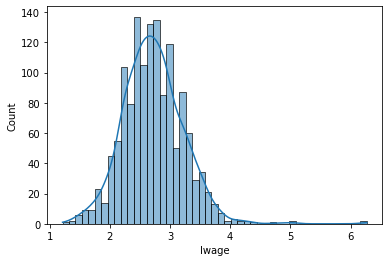

In [10]:
sns.histplot(data=new_data, x="lwage", kde=True)

<AxesSubplot:xlabel='lwage', ylabel='Density'>

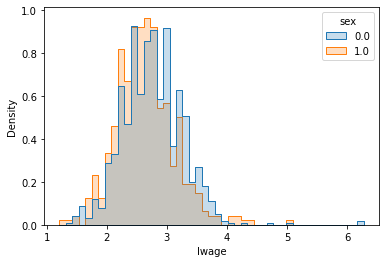

In [11]:
sns.histplot(
    new_data, x="lwage", hue="sex", element="step",
    stat="density", common_norm=False,
)

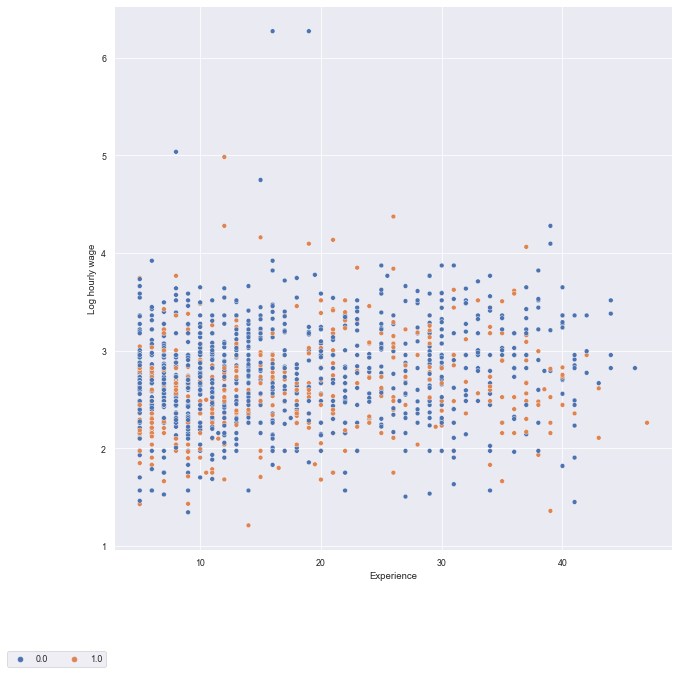

In [51]:
sns.set('paper')
plt.figure(figsize=(10, 10))
plot = sns.scatterplot(data=new_data, x="exp1", y="lwage", hue="sex")

plt.xlabel('Experience')
plt.ylabel('Log hourly wage')

plot.legend(loc='center left', bbox_to_anchor=(-0.2, -0.2), ncol=3)

In [12]:
# Variables construction

Y = np.log(new_data['wage']) 
n = len(Y)
z = new_data.loc[:, ~ new_data.columns.isin(['wage', 'lwage','Unnamed: 0'])]
p = z.shape[1]

print("Number of observation:", n, '\n')
print( "Number of raw regressors:", p)

Number of observation: 1376 

Number of raw regressors: 18


In [13]:
table1 = pd.DataFrame(data=table, columns={"Sample mean":"0"} )
table1.index
index1 = list(table1.index)
index2 = ["Log Wage","Sex","Some High School","High School Graduate",\
          "Some College","College Graduate", "Advanced Degree","Midwest",\
          "South","West","Northeast","Experience"]
table1

,Sample mean
lwage,2.718562
sex,0.321948
shs,0.087209
hsg,0.912791
scl,0.000000
clg,0.000000
ad,0.000000
mw,0.286337
so,0.291424
we,0.198401


In [14]:
# Compare Basic model and Flexible model
# Import packages for OLS regression
import statsmodels.api as sm
import statsmodels.formula.api as smf

1. Basic Model

In [15]:
basic = 'lwage ~ sex + exp1 + shs + hsg+ scl + clg + mw + so + we + occ2+ ind2'
basic_results = smf.ols(basic , data=new_data).fit()
print(basic_results.summary()) # estimated coefficients
print( "Number of regressors in the basic model:",len(basic_results.params), '\n')  # number of regressors in the Basic Model

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     6.212
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           9.07e-33
Time:                        22:58:08   Log-Likelihood:                -872.87
No. Observations:                1376   AIC:                             1842.
Df Residuals:                    1328   BIC:                             2093.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0216      0.062     32.368      0.0

2. Flexible Model

In [16]:
flex = 'lwage ~ sex + shs+hsg+scl+clg+occ2+ind2+mw+so+we + (exp1+exp2+exp3+exp4)*(shs+hsg+scl+clg+occ2+ind2+mw+so+we)'
flex_results_0 = smf.ols(flex , data=new_data)
flex_results = smf.ols(flex , data=new_data).fit()
print(flex_results.summary()) # estimated coefficients
print( "Number of regressors in the basic model:",len(flex_results.params), '\n') # number of regressors in the Flexible Model

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     2.336
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.45e-19
Time:                        22:58:09   Log-Likelihood:                -754.12
No. Observations:                1376   AIC:                             1954.
Df Residuals:                    1153   BIC:                             3120.
Df Model:                         222                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.6536      0.969     

In [17]:
#comparing the number of regresor
print("The basic model has",len(basic_results.params), "regressors, while the flexible model has",len(flex_results.params),"regressors.")

The basic model has 51 regressors, while the flexible model has 246 regressors.


In [18]:
# LASSO using hdmpy
import hdmpy

In [19]:
Y = new_data['lwage']
W = new_data.drop(['lwage', 'sex'], 1 )
D = new_data['sex']

C:\Users\Alvaro\AppData\Local\Temp/ipykernel_9428/3520714781.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  W = new_data.drop(['lwage', 'sex'], 1 )


In [20]:
lasso_direct = hdmpy.rlassoEffect(x=W, y=Y, d=D, method="partialling out")
lasso_direct

C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2642: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\function_base.py:2643: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Alvaro\anaconda3\lib\site-packages\numpy\lib\func

{'alpha': -0.10799271178405838,
 'se': array([0.0289595]),
 't': array([-3.72909498]),
 'pval': array([0.00019217]),
 'coefficients': -0.10799271178405838,
 'coefficient': -0.10799271178405838,
 'coefficients_reg':                     0
 (Intercept)  2.945489
 x0           0.000000
 x1           0.000000
 x2           0.000000
 x3           0.000000
 x4           0.000000
 x5           0.000000
 x6           0.000000
 x7          -0.096595
 x8           0.000000
 x9           0.000000
 x10          0.007894
 x11          0.000000
 x12          0.000000
 x13          0.000000
 x14          0.000000
 x15         -0.010033
 x16          0.000000
 x17         -0.015258,
 'selection_index': array([[False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [ True],
        [False],
        [False],
        [False],
        [False],
        [ True],
        [False],
        [ True]])

In [21]:
est_lasso = lasso_direct["coefficients"]
std_lasso = lasso_direct["se"]
lower_ci_lasso = est_lasso - 1.96*std_lasso
upper_ci_lasso = est_lasso + 1.96*std_lasso

In [22]:
table_4 = np.zeros( (1, 4) )

table_4[0,0] = est_lasso   
table_4[0,1] = std_lasso    
table_4[0,2] = lower_ci_lasso 
table_4[0,3] = upper_ci_lasso     


table_4_pandas = pd.DataFrame( table_4, columns = [ "Estimator","Std. Error", "lower bound CI", "upper bound CI"  ]) 
table_4_pandas.index = [ "LASSO_direct" ]
table_4_pandas

,Estimator,Std. Error,lower bound CI,upper bound CI
LASSO_direct,-0.107993,0.028959,-0.164753,-0.051232


In [23]:
# Using Sklearn
from sklearn.linear_model import LassoCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error 

In [24]:
# Get exogenous variables from flexible model
X = flex_results_0.exog
X.shape

(1376, 246)

In [25]:
# Set endogenous variable
lwage = new_data["lwage"]
lwage.shape

(1376,)

In [26]:
# (lambda penalty value)
alpha=0.1

In [27]:

reg = linear_model.Lasso(alpha = alpha)

# LASSO regression for flexible model

lwage_lasso_fitted = reg.fit(X, lwage).predict( X )

# coefficients 
reg.coef_
print('Lasso Regression: R^2 score', reg.score(X, lwage))

Lasso Regression: R^2 score 0.13375755009825596


In [28]:
# Check predicted values
lwage_lasso_fitted

array([2.84290305, 3.12515477, 2.83313878, ..., 2.76992564, 2.72309227,
       2.70336499])

In [29]:
# Basic Model
basic = 'lwage ~ sex + exp1 + shs + hsg + mw + so + we + occ2+ ind2'

basic_results = smf.ols(basic , data=new_data).fit()

# Flexible model 
flex = 'lwage ~ sex + (exp1+exp2+exp3+exp4+shs+hsg+occ2+ind2+mw+so+we)**2'

flex_results = smf.ols(flex , data=new_data).fit()

In [30]:
# Assess the predictive performance
R2_1 = basic_results.rsquared
print("R-squared for the basic model: ", R2_1, "\n")
R2_adj1 = basic_results.rsquared_adj
print("adjusted R-squared for the basic model: ", R2_adj1, "\n")

R2_2 = flex_results.rsquared
print("R-squared for the flexible model: ", R2_2, "\n")
R2_adj2 = flex_results.rsquared_adj
print("adjusted R-squared for the flexible model: ", R2_adj2, "\n")

R2_L = reg.score(flex_results_0.exog, lwage)
print("R-squared for LASSO: ", R2_L, "\n")
R2_adjL = 1 - (1-R2_L)*(len(lwage)-1)/(len(lwage)-X.shape[1]-1)  # one more for intercetp
print("adjusted R-squared for LASSO: ", R2_adjL, "\n")

R-squared for the basic model:  0.18023814876721034 

adjusted R-squared for the basic model:  0.15122549288773657 

R-squared for the flexible model:  0.5099981483772854 

adjusted R-squared for the flexible model:  0.2352411509861152 

R-squared for LASSO:  0.13375755009825596 

adjusted R-squared for LASSO:  -0.05498969762169881 



In [31]:
# calculating the MSE
MSE1 =  np.mean(basic_results.resid**2)
print("MSE for the basic model: ", MSE1, "\n")
p1 = len(basic_results.params) # number of regressors
n = len(lwage)
MSE_adj1  = (n/(n-p1))*MSE1
print("adjusted MSE for the basic model: ", MSE_adj1, "\n")

MSE2 =  np.mean(flex_results.resid**2)
print("MSE for the flexible model: ", MSE2, "\n")
p2 = len(flex_results.params) # number of regressors
n = len(lwage)
MSE_adj2  = (n/(n-p2))*MSE2
print("adjusted MSE for the flexible model: ", MSE_adj2, "\n")

MSEL = mean_squared_error(lwage, lwage_lasso_fitted)
print("MSE for the LASSO model: ", MSEL, "\n")
pL = reg.coef_.shape[0] # number of regressors
n = len(lwage)
MSE_adjL  = (n/(n-pL))*MSEL
print("adjusted MSE for LASSO model: ", MSE_adjL, "\n")

MSE for the basic model:  0.20821908377460768 

adjusted MSE for the basic model:  0.2159076558205427 

MSE for the flexible model:  0.12446021541415923 

adjusted MSE for the flexible model:  0.3432009146490643 

MSE for the LASSO model:  0.22002513165740517 

adjusted MSE for LASSO model:  0.26792440810671636 



In [32]:
pip install array_to_latex

Note: you may need to restart the kernel to use updated packages.


In [33]:
import array_to_latex as a2l

In [34]:
# Package for latex table 
import array_to_latex as a2l

table = np.zeros((3, 5))
table[0,0:5] = [p1, R2_1, MSE1, R2_adj1, MSE_adj1]
table[1,0:5] = [p2, R2_2, MSE2, R2_adj2, MSE_adj2]
table[2,0:5] = [pL, R2_L, MSEL, R2_adjL, MSE_adjL]
table

array([[ 4.90000000e+01,  1.80238149e-01,  2.08219084e-01,
         1.51225493e-01,  2.15907656e-01],
       [ 8.77000000e+02,  5.09998148e-01,  1.24460215e-01,
         2.35241151e-01,  3.43200915e-01],
       [ 2.46000000e+02,  1.33757550e-01,  2.20025132e-01,
        -5.49896976e-02,  2.67924408e-01]])

In [35]:
table = pd.DataFrame(table, columns = ["p","$R^2_{sample}$","$MSE_{sample}$","$R^2_{adjusted}$", "$MSE_{adjusted}$"], \
                      index = ["basic reg","flexible reg", "lasso flex"])
table

,p,$R^2_{sample}$,$MSE_{sample}$,$R^2_{adjusted}$,$MSE_{adjusted}$
basic reg,49.0,0.180238,0.208219,0.151225,0.215908
flexible reg,877.0,0.509998,0.124460,0.235241,0.343201
lasso flex,246.0,0.133758,0.220025,-0.054990,0.267924


Considering all measures above, the flexible model performs better than the basic model (Less MSE sample and MSEadj.).
One procedure to circumvent this issue is to use data splitting that is described and applied in the following.

#### Data Splitting
Measure the prediction quality of the two models via data splitting:

In [36]:
# Import relevant packages for splitting data
import random
import math

# Set Seed
# to make the results replicable (generating random numbers)
np.random.seed(0)
random = np.random.randint(0,n, size=math.floor(n))
new_data["random"] = random
random    # the array does not change 

C:\Users\Alvaro\AppData\Local\Temp/ipykernel_9428/3829021511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["random"] = random


array([ 684,  559, 1216, ..., 1294,  573, 1367])

In [37]:
data_2 = new_data.sort_values(by=['random'])
data_2.head()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,random
rownames,,,,,,,,,,,,,,,,,,,,,
9262,9.134615,2.212071,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,0.25,0.125,0.0625,9360,22,5090,9,0
14134,24.038462,3.179655,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,11.0,1.21,1.331,1.4641,4250,14,7770,16,0
8689,12.980769,2.563469,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,17.0,2.89,4.913,8.3521,5620,17,5380,9,3
11486,12.980769,2.563469,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,7.0,0.49,0.343,0.2401,4760,16,5790,9,3
20866,34.615385,3.544298,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,5.0,0.25,0.125,0.0625,220,1,770,4,3


In [38]:
# Create training and testing sample 
train = data_2[ : math.floor(n*4/5)]    # training sample
test =  data_2[ math.floor(n*4/5) : ]   # testing sample
print(train.shape)
print(test.shape)

(1100, 21)
(276, 21)


Use the training sample for estimating the parameters of the Basic Model and the Flexible Model.

In [39]:
# Basic Model
# estimating the parameters in the training sample

basic_results = smf.ols(basic , data=train).fit()
print(basic_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     5.265
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           2.13e-25
Time:                        22:58:12   Log-Likelihood:                -711.67
No. Observations:                1100   AIC:                             1519.
Df Residuals:                    1052   BIC:                             1759.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0547      0.071     28.859      0.0

In [40]:
#test
lwage_test = test["lwage"].values

In [41]:

# calculating the out-of-sample MSE
test = sm.add_constant(test)   #add constant 
lwage_pred =  basic_results.predict(test) # predict out of sample

MSE_test1 = np.sum((lwage_test-lwage_pred)**2)/len(lwage_test)
R2_test1  = 1 - MSE_test1/np.var(lwage_test)

print("Test MSE for the basic model: ", MSE_test1, " ")
print("Test R2 for the basic model: ", R2_test1)

Test MSE for the basic model:  0.19987102511489896  
Test R2 for the basic model:  0.04156410192333848


C:\Users\Alvaro\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# Flexible Model
# estimating the parameters in the training sample
flex_results = smf.ols(flex , data=train).fit()
print(flex_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     1.656
Date:                Fri, 15 Apr 2022   Prob (F-statistic):           1.91e-09
Time:                        22:58:12   Log-Likelihood:                -386.07
No. Observations:                1100   AIC:                             1712.
Df Residuals:                     630   BIC:                             4064.
Df Model:                         469                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.65

In [43]:

# calculating the out-of-sample MSE
lwage_flex_pred =  flex_results.predict(test) # predict out of sample

MSE_test2 = np.sum((lwage_test-lwage_flex_pred)**2)/len(lwage_test)
R2_test2  = 1 - MSE_test2/np.var(lwage_test)

print("Test MSE for the flexible model: ", MSE_test2, " ")
print("Test R2 for the flexible model: ", R2_test2)

Test MSE for the flexible model:  22.705382420989025  
Test R2 for the flexible model:  -107.87848090699808


In [44]:
lwage_flex_pred

rownames
30171    2.870137
20062    2.541298
26099    1.856472
29638    2.870137
24679    3.434567
           ...   
5201     2.484293
9639     2.560749
15695    3.112902
3853     2.984612
20067    2.638935
Length: 276, dtype: float64

In [45]:
lwage_pred

rownames
30171    2.849302
20062    2.635376
26099    2.518647
29638    2.849302
24679    2.917170
           ...   
5201     2.528900
9639     2.805803
15695    2.242189
3853     2.914903
20067    2.408205
Length: 276, dtype: float64

Flexible model using lasso


In [46]:
# get exogenous variables from training data used in flex model
flex_results_0 = smf.ols(flex , data=train)
X_train = flex_results_0.exog
print(X_train.shape)

# Get endogenous variable 
lwage_train = train["lwage"]
print(lwage_train.shape)

(1100, 877)
(1100,)


In [47]:
# flexible model using lasso
# get exogenous variables from testing data used in flex model
flex_results_1 = smf.ols(flex , data=test)
X_test = flex_results_1.exog
print(X_test.shape)

# Get endogenous variable 
lwage_test = test["lwage"]
print(lwage_test.shape)

(276, 877)
(276,)


In [48]:
# calculating the out-of-sample MSE
reg = linear_model.Lasso(alpha=0.1)
lwage_lasso_fitted = reg.fit(X_train, lwage_train).predict( X_test )

MSE_lasso = np.sum((lwage_test-lwage_lasso_fitted)**2)/len(lwage_test)
R2_lasso  = 1 - MSE_lasso/np.var(lwage_test)

print("Test MSE for the flexible model: ", MSE_lasso, " ")
print("Test R2 for the flexible model: ", R2_lasso)

Test MSE for the flexible model:  0.19336101976713727  
Test R2 for the flexible model:  0.07278134723630492


C:\Users\Alvaro\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.722e+01, tolerance: 2.901e-02
  model = cd_fast.enet_coordinate_descent(


In [49]:
table2 = np.zeros((3, 2))
table2[0,0] = MSE_test1
table2[1,0] = MSE_test2
table2[2,0] = MSE_lasso
table2[0,1] = R2_test1
table2[1,1] = R2_test2
table2[2,1] = R2_lasso

table2 = pd.DataFrame(table2, columns = ["$MSE_{test}$", "$R^2_{test}$"], \
                      index = ["basic reg","flexible reg","lasso regression"])
table2

,$MSE_{test}$,$R^2_{test}$
basic reg,0.199871,0.041564
flexible reg,22.705382,-107.878481
lasso regression,0.193361,0.072781


We notice that the basic model (basic_reg) fits better when the estimators are tested out of the training sample. 
The data splitting of the flexible model (flexible_reg) shows a large negative R2 and large MSEtets. This problem may appear due to a large number of regressors in the flexible model and the small size of the test sample.